## 導入包與載入數據

In [82]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn import cross_validation,metrics
from sklearn.grid_search import GridSearchCV,RandomizedSearchCV 
import warnings
warnings.filterwarnings('ignore')
train=pd.read_csv('./Data/Titanic/train.csv',dtype={"Age":np.float64})
test=pd.read_csv('./Data/Titanic/test.csv',dtype={"Age":np.float64})
PassengerId=test['PassengerId']
all_data=pd.concat([train,test],ignore_index=True)

# 數據可視化

### Sex Feature：女性倖存率遠高於男性

Percentage of females who survived:74.20
Percentage of males who survived:18.89


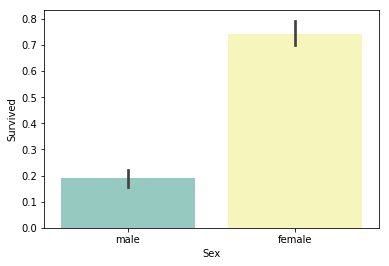

In [83]:
# Sex Feature：女性倖存率遠高於男性

sns.barplot(x="Sex",y="Survived",data=train,palette='Set3')
# value_counts(normalize=True) 計算佔的比例
print("Percentage of females who survived:%.2f"%(train["Survived"][train["Sex"]=='female'].value_counts(normalize=True)[1]*100))
print("Percentage of males who survived:%.2f"%(train["Survived"][train["Sex"]=='male'].value_counts(normalize=True)[1]*100))

### Pclass Feature：乘客社會等級越高，倖存率越高

Percentage of Pclass = 1 who survived:62.96
Percentage of Pclass = 2 who survived:47.28
Percentage of Pclass = 3 who survived:24.24


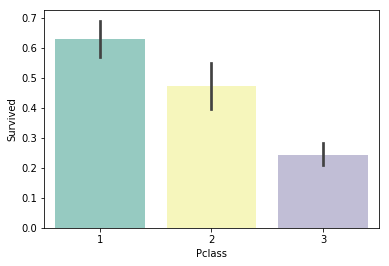

In [84]:
sns.barplot(x="Pclass",y="Survived",data=train,palette='Set3')
print("Percentage of Pclass = 1 who survived:%.2f"%(train["Survived"][train["Pclass"]==1].value_counts(normalize=True)[1]*100))
print("Percentage of Pclass = 2 who survived:%.2f"%(train["Survived"][train["Pclass"]==2].value_counts(normalize=True)[1]*100))
print("Percentage of Pclass = 3 who survived:%.2f"%(train["Survived"][train["Pclass"]==3].value_counts(normalize=True)[1]*100))

### SibSp Feature：配偶及兄弟姐妹數適中的乘客倖存率更高

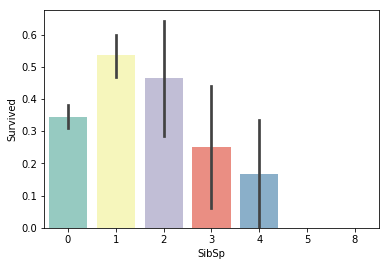

In [85]:
sns.barplot(x="SibSp",y="Survived",data=train,palette='Set3')

### Parch Feature：父母與子女數適中的乘客倖存率更高

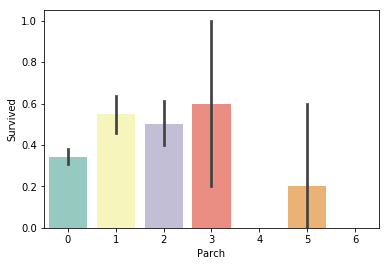

In [86]:
# palette = 調色盤
sns.barplot(x="Parch",y="Survived",data=train,palette='Set3')

### Age Feature：未成年人倖存率高於成年人

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x7f5e79c3f160>>

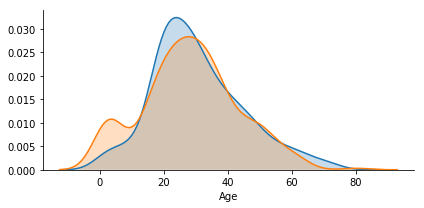

In [87]:
facet=sns.FacetGrid(train,hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade=True)
#facet.set(xlim=(0,train['Age'].max))
facet.add_legend

### Fare Feature：支出船票費越高倖存率越高

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x7f5e79bb3438>>

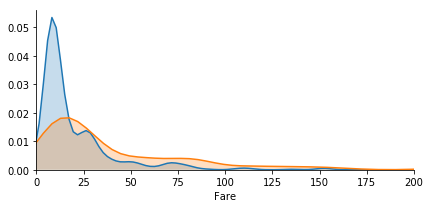

In [88]:
facet=sns.FacetGrid(train,hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,200))
facet.add_legend

### Title Feature(New)：不同稱呼的乘客倖存率不同

In [89]:
#all_data['Title']=all_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0])
#Title_Dict={}
# fromkeys() 函数用于创建一个新字典，以序列seq中元素做字典的键，value为字典所有键对应的初始值。
#Title_Dict.update(dict.fromkeys(['Capt','Col','Major','Dr','Rev'],'Officer'))
#Title_Dict.update(dict.fromkeys(['Don','Sir','the Countess','Dona','Lady'],'Royalty'))
#Title_Dict.update(dict.fromkeys(['Mme','Ms','Mrs'],'Mrs'))
#Title_Dict.update(dict.fromkeys(['Mlle','Miss'],'Miss'))
#Title_Dict.update(dict.fromkeys(['Mr'],'Mr'))
#Title_Dict.update(dict.fromkeys(['Master','Jonkheer'],'Master'))
#all_data['Title']=all_data['Title'].map(Title_Dict)
#print(Title_Dict)
#print(all_data['Title'])

#sns.barplot(x="Title",y="Survived",data=all_data,palette='Set3')

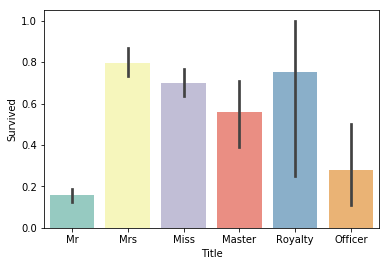

In [90]:
all_data['Title1'] = all_data['Name'].str.split(", ", expand=True)[1]
all_data['Title1'] = all_data['Title1'].str.split(".", expand=True)[0]
all_data['Title'] = all_data['Title1'].replace(['Capt','Col','Major','Dr','Rev','Don','Sir','the Countess','Dona','Lady',
                                               'Mme','Ms','Mrs','Mlle','Miss','Mr','Master','Jonkheer'],
         ['Officer','Officer','Officer','Officer','Officer','Royalty','Royalty','Royalty','Royalty','Royalty',
         'Mrs','Mrs','Mrs','Miss','Miss','Mr','Master','Master'])
sns.barplot(x="Title",y="Survived",data=all_data,palette='Set3')

### FamilyLabel Feature(New)：家庭人數為2到4的乘客倖存率較高

### 新增FamilyLabel特徵，先計算FamilySize=Parch+SibSp+1，然後把FamilySize分為三類。

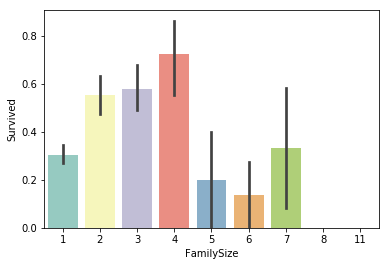

In [91]:
all_data['FamilySize']=all_data['SibSp']+all_data['Parch']+1
sns.barplot(x="FamilySize",y="Survived",data=all_data,palette='Set3')

### 按生存率把FamilySize分為三類，構成FamilyLabel特徵。

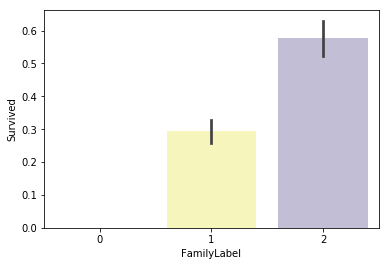

In [92]:
def Fam_label(s):
    if(s>=2)&(s<=4):
        return 2 
    elif((s>4)&(s<=7))|(s==1):
        return 1 
    elif(s>7):
        return 0
all_data['FamilyLabel']=all_data['FamilySize'].apply(Fam_label)
sns.barplot(x="FamilyLabel",y="Survived",data=all_data,palette='Set3')

## Deck Feature(New)：不同甲板的乘客倖存率不同

### 新增Deck特徵，先把Cabin空缺值填充為'Unknown'，再提取Cabin中的首字母構成乘客的甲板號。

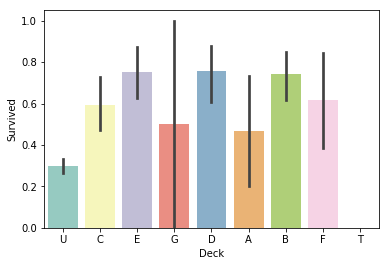

In [93]:
all_data['Cabin']=all_data['Cabin'].fillna('Unknown')
all_data['Deck']=all_data['Cabin'].str.get(0)
sns.barplot(x="Deck",y="Survived",data=all_data,palette='Set3')

##  TicketGroup Feature(New)：與2至4人共票號的乘客倖存率較高

### 新增TicketGroup特徵，統計每個乘客的共票號數。

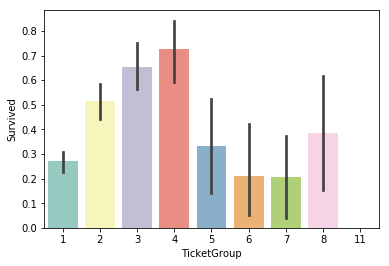

In [94]:
Ticket_Count= dict(all_data['Ticket'].value_counts())
all_data['TicketGroup']=all_data['Ticket'].apply(lambda x:Ticket_Count[x])
sns.barplot(x='TicketGroup',y='Survived',data=all_data,palette='Set3')

### 按生存率把TicketGroup分為三類。

In [95]:
def Ticket_Label(s):
    if(s>=2)&(s<=4):
        return 2 
    elif((s>4)&(s<=8))|(s==1):
        return 1
    elif(s>8):
        return 0
    all_data['TicketGroup']=all_data['TicketGroup'].apply(Ticket_Label)
    sns.barplot(x='TicketGroup',y='Survived',data=all_data,palette='Set3')

# 數據清洗

## 缺失值填充

### Age Feature：Age缺失量為263，缺失量較大，用Sex, Title, Pclass三個特徵構建隨機森林模型，填充年齡缺失值

In [96]:
age_df=all_data[['Age','Pclass','Sex','Title']]
# get_dummies = onehot編碼
age_df=pd.get_dummies(age_df)

# as_matrix() = 轉array
known_age=age_df[age_df['Age'].notnull()].as_matrix()
unknown_age=age_df[age_df['Age'].isnull()].as_matrix()
y=known_age[:,0]
X=known_age[:,1:]
rfr=RandomForestRegressor(random_state=0,n_estimators=100,n_jobs=-1)
rfr.fit(X,y)
predictedAges=rfr.predict(unknown_age[:,1::])
all_data.loc[(all_data['Age'].isnull()),'Age']=predictedAges
all_data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title1,Title,FamilySize,FamilyLabel,Deck,TicketGroup
0,22.000000,Unknown,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,Mr,2,2,U,1
1,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,Mrs,2,2,C,2
2,26.000000,Unknown,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,Miss,1,1,U,1
3,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,Mrs,2,2,C,2
4,35.000000,Unknown,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,Mr,1,1,U,1
5,28.226256,Unknown,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,Mr,1,1,U,1
6,54.000000,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,Mr,1,1,E,2
7,2.000000,Unknown,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,Master,5,1,U,5
8,27.000000,Unknown,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,Mrs,3,2,U,3
9,14.000000,Unknown,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,Mrs,2,2,U,2


### Embarked Feature：Embarked缺失量為2，缺失Embarked信息的乘客的Pclass均為1，且Fare均為80，因為Embarked為C且Pclass為1的乘客的Fare中位數為80，所以缺失值填充為C。

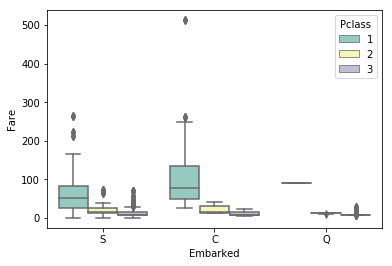

In [97]:
all_data[all_data['Embarked'].isnull()]
sns.boxplot(x="Embarked",y="Fare",hue="Pclass",data=all_data,palette="Set3")
all_data['Embarked']=all_data['Embarked'].fillna('C')

### Fare Feature：Fare缺失量為1，缺失Fare信息的乘客的Embarked為S，Pclass為3，所以用Embarked為S，Pclass為3的乘客的Fare中位數填充

In [98]:
all_data[all_data['Fare'].isnull()]
fare=all_data[(all_data['Embarked']=="S")&(all_data['Pclass']==3)].Fare.median
all_data['Fare']=all_data['Fare'].fillna(fare)

## 同組識別

### 把姓氏相同的乘客劃分為同一組，從人數大於一的組中分別提取出每組的婦女兒童和成年男性。

In [99]:
all_data['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
5                                        Moran, Mr. James
6                                 McCarthy, Mr. Timothy J
7                          Palsson, Master. Gosta Leonard
8       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                     Nasser, Mrs. Nicholas (Adele Achem)
10                        Sandstrom, Miss. Marguerite Rut
11                               Bonnell, Miss. Elizabeth
12                         Saundercock, Mr. William Henry
13                            Andersson, Mr. Anders Johan
14                   Vestrom, Miss. Hulda Amanda Adolfina
15                       Hewlett, Mrs. (Mary D Kingcome) 
16                                   Rice, Master. Eugene
17            

In [100]:
all_data['Surname']=all_data['Name'].apply(lambda x:x.split(',')[0])
Surname_Count=dict(all_data['Surname'].value_counts())
all_data['FamilyGroup']=all_data['Surname'].apply(lambda x:Surname_Count[x])
Female_Child_Group=all_data.loc[(all_data['FamilyGroup']>=2)&((all_data['Age']<=12)|(all_data['Sex']=='female'))]
Male_Adult_Group=all_data.loc[(all_data['FamilyGroup']>=2)&(all_data['Age']>12)&(all_data['Sex']=='male')]
Female_Child_Group

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title1,Title,FamilySize,FamilyLabel,Deck,TicketGroup,Surname,FamilyGroup
1,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,Mrs,2,2,C,2,Cumings,2
3,35.000000,C123,S,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,Mrs,2,2,C,2,Futrelle,2
7,2.000000,Unknown,S,21.075,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,Master,5,1,U,5,Palsson,5
8,27.000000,Unknown,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,Mrs,3,2,U,3,Johnson,6
9,14.000000,Unknown,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,Mrs,2,2,U,2,Nasser,2
10,4.000000,G6,S,16.7,"Sandstrom, Miss. Marguerite Rut",1,11,3,female,1,1.0,PP 9549,Miss,Miss,3,2,G,3,Sandstrom,3
11,58.000000,C103,S,26.55,"Bonnell, Miss. Elizabeth",0,12,1,female,0,1.0,113783,Miss,Miss,1,1,C,1,Bonnell,2
16,2.000000,Unknown,Q,29.125,"Rice, Master. Eugene",1,17,3,male,4,0.0,382652,Master,Master,6,1,U,6,Rice,6
18,31.000000,Unknown,S,18,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0,19,3,female,1,0.0,345763,Mrs,Mrs,2,2,U,2,Vander Planke,4
22,15.000000,Unknown,Q,8.0292,"McGowan, Miss. Anna ""Annie""",0,23,3,female,0,1.0,330923,Miss,Miss,1,1,U,1,McGowan,2


### 發現絕大部分女性和兒童組的平均存活率都為1或0，即同組的女性和兒童要麼全部倖存，要麼全部遇難。

In [101]:
Female_Child=pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns=['GroupCount']
Female_Child

,GroupCount
1.000000,115
0.000000,31
0.750000,2
0.333333,1
0.142857,1


Text(0.5,0,'AverageSurvived')

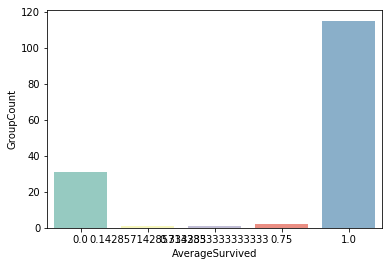

In [102]:
sns.barplot(x=Female_Child.index,y=Female_Child["GroupCount"],palette='Set3').set_xlabel('AverageSurvived')

### 絕大部分成年男性組的平均存活率也為1或0

In [103]:
Male_Adult=pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns=['GroupCount']
Male_Adult

,GroupCount
0.000000,122
1.000000,20
0.500000,6
0.333333,2
0.250000,1


Text(0.5,0,'AverageSurvived')

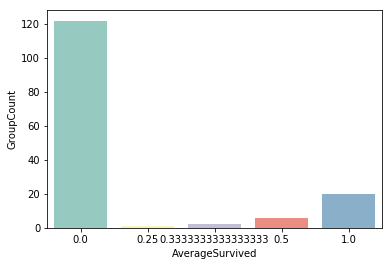

In [104]:
sns.barplot(x=Male_Adult.index,y=Male_Adult['GroupCount'],palette='Set3').set_xlabel('AverageSurvived')

In [105]:
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_List)
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
print(Survived_List)

{'Van Impe', 'Danbom', 'Arnold-Franchi', 'Strom', 'Johnston', 'Sage', 'Lobb', 'Cacic', 'Lefebre', 'Skoog', 'Jussila', 'Oreskovic', 'Bourke', 'Lahtinen', 'Boulos', 'Zabour', 'Rosblom', 'Olsson', 'Rice', 'Turpin', 'Panula', 'Ilmakangas', 'Ford', 'Attalah', 'Robins', 'Vander Planke', 'Goodwin', 'Palsson', 'Caram', 'Canavan', 'Barbara'}
{'Beane', 'Bishop', 'Frolicher-Stehli', 'Harder', 'Duff Gordon', 'Jussila', 'Cardeza', 'Beckwith', 'McCoy', 'Nakid', 'Taylor', 'Jonsson', 'Bradley', 'Goldenberg', 'Greenfield', 'Chambers', 'Kimball', 'Dick', 'Frauenthal', 'Daly'}


In [106]:
train=all_data.loc[all_data['Survived'].notnull()]
test=all_data.loc[all_data['Survived'].isnull()]
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Sex']='male'
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Age']=60
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Title']='Mr'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Sex']='female'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Age']=5
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Title']='Miss'

In [107]:
all_data=pd.concat([train,test])
all_data=all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','FamilyLabel','Deck','TicketGroup']]
all_data=pd.get_dummies(data = all_data,columns=["Sex","Embarked","Title","Deck"])
train=all_data[all_data['Survived'].notnull()]#.drop(["Sex","Embarked","Title","Deck"],axis=1,inplace=True)
#test=all_data[all_data['Survived'].isnull()].drop(['Survived'],axis=1,inplace=True)
test=all_data[all_data['Survived'].isnull()].drop('Survived',axis=1)
train = train.drop('Fare',axis=1)
test = test.drop('Fare',axis=1)

X=train.iloc[:,1:]
y=train.iloc[:,0]

In [108]:
pipe=Pipeline([('select',SelectKBest(k=20)),('classify',RandomForestClassifier(random_state=10,max_features='sqrt'))])
param_test={'classify__n_estimators':list(range(20,50,2)),'classify__max_depth':list(range(3,60,3))}
gsearch=GridSearchCV(estimator=pipe,param_grid=param_test,scoring='roc_auc',cv=10)
gsearch.fit(X,y)
print(gsearch.best_params_,gsearch.best_score_)

{'classify__max_depth': 6, 'classify__n_estimators': 42} 0.8769997094054663


In [109]:
select=SelectKBest(k=20)
clf=RandomForestClassifier(random_state=10,warm_start=True,n_estimators=26,max_depth=6,max_features='sqrt')
pipeline=make_pipeline(select,clf)
pipeline.fit(X,y)

Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=20, score_func=<function f_classif at 0x7f5e870e2158>)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0....estimators=26, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=True))])

In [110]:
cv_score=cross_validation.cross_val_score(pipeline,X,y,cv=10)
print("CV Score : Mean - %.7g | Std - %.7g "%(np.mean(cv_score),np.std(cv_score)))


CV Score : Mean - 0.8316814 | Std - 0.03387199 


In [111]:
test.info()
print(test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 24 columns):
Pclass           418 non-null int64
Age              418 non-null float64
FamilyLabel      418 non-null int64
TicketGroup      418 non-null int64
Sex_female       418 non-null uint8
Sex_male         418 non-null uint8
Embarked_C       418 non-null uint8
Embarked_Q       418 non-null uint8
Embarked_S       418 non-null uint8
Title_Master     418 non-null uint8
Title_Miss       418 non-null uint8
Title_Mr         418 non-null uint8
Title_Mrs        418 non-null uint8
Title_Officer    418 non-null uint8
Title_Royalty    418 non-null uint8
Deck_A           418 non-null uint8
Deck_B           418 non-null uint8
Deck_C           418 non-null uint8
Deck_D           418 non-null uint8
Deck_E           418 non-null uint8
Deck_F           418 non-null uint8
Deck_G           418 non-null uint8
Deck_T           418 non-null uint8
Deck_U           418 non-null uint8
dtypes: float64(1), int64(

In [112]:
#test['Fare']=pd.DataFrame(test['Fare'],dtype=np.float)

In [113]:
predictions=pipeline.predict(test)
submission=pd.DataFrame({"PassengerId":PassengerId,"Survived":predictions.astype(np.int32)})
submission.to_csv("./Data/Titanic/submission_sharecourse.csv",index=False)